# Лабораторная работа 2. Вариант 5.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import norm, lognorm, expon
from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1. 
Загрузить данные из файла train.csv. Подготовить данные для
дальнейшего анализа, исключив их них экстремально большие
значения.

In [4]:
df = pd.read_csv(r'train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Рассмотрим описательные статистики для переменной SalePrice.

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Удалим все значения, которые не попадают в интервал $mean \pm 3std$. Так как нас интересуют именно экстремально большие значения, то рассмотрим правую границу: $180921 + 238327.5 = 419248.5$

In [8]:
df = df[df['SalePrice'] < 419248]
data = df['SalePrice']

data.describe()

count      1438.000000
mean     175844.522253
std       67475.861228
min       34900.000000
25%      129500.000000
50%      161500.000000
75%      210000.000000
max      415298.000000
Name: SalePrice, dtype: float64

Видим, что все показатели, кроме наибольшего значения, изменились незначительно. 

## Задание 2. 

Подобрать три непрерывных распределения (минимум два должны
подходить по форме) и с помощью каждого из них приблизить
соответствующие распределения выборочных данн.

Сперва выясним форму распределения выбранных данных самым простым способом, а именно построим гистограмму распредлеения.ых

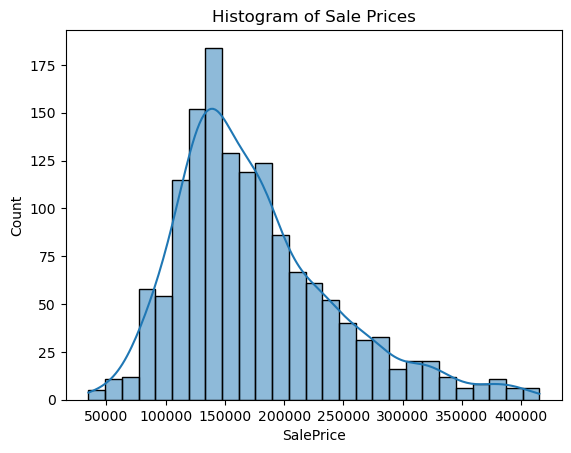

In [10]:
sns.histplot(data, kde=True)

plt.title('Histogram of Sale Prices')
plt.show()

В целом, опираясь только на гистограмму, можно сказать, что наше распределение напоминает Логнормальное или экспоненциальное распределения. И в качестве третьего распределения возьмем нормальное распределение

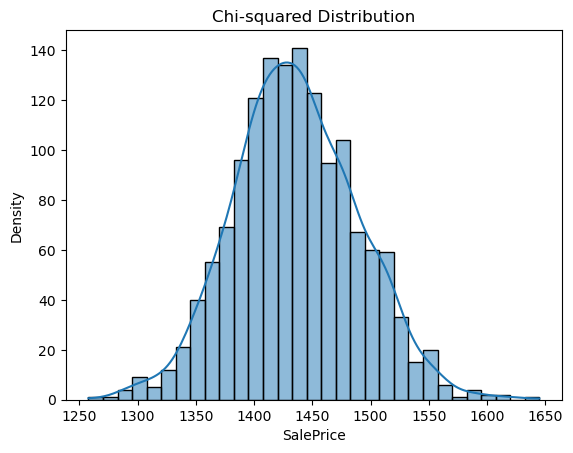

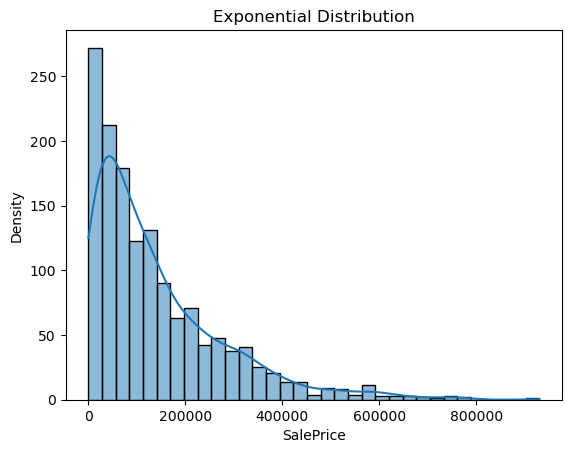

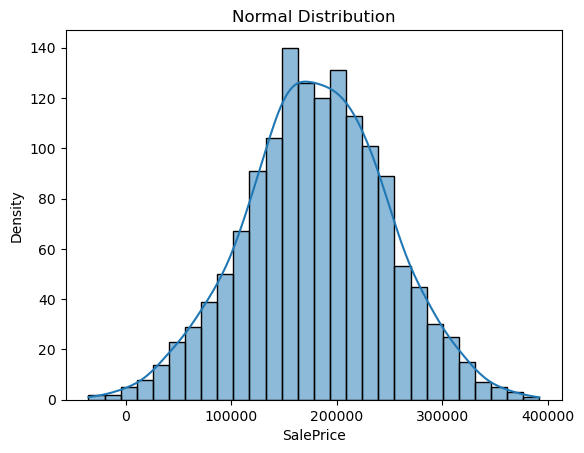

In [12]:
df_chi2 = len(data) - 1
chi2_dist = np.random.chisquare(df_chi2, len(data))
sns.histplot(chi2_dist, kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Chi-squared Distribution')
plt.show()

loc, scale = expon.fit(data)
ex_dist = np.random.exponential(scale, len(data))
sns.histplot(ex_dist, kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Exponential Distribution')
plt.show()

mu, std = norm.fit(data)
n_dist = np.random.normal(mu, std, len(data))
sns.histplot(n_dist, kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Normal Distribution')
plt.show()

## Задание 3.
Вывести оценки параметров распределения. Построить графики.

In [14]:
print(f'Параметры распределения для хи-квадрат распределения: {chi2_dist}.')
print(f'Параметры распределения для экспоненциального распределения: {loc}, {scale}.')
print(f'Параметры распредлеения для нормального распределения: {mu}, {std}')

Параметры распределения для хи-квадрат распределения: [1410.76837149 1521.49426687 1440.00557878 ... 1429.22917698 1468.8869886
 1419.53115134].
Параметры распределения для экспоненциального распределения: 34900.0, 140944.52225312934.
Параметры распредлеения для нормального распределения: 175844.52225312934, 67452.39544324973


## Задание 4.
Для проверки согласованности данных с распределением и выбора
лучшего приближения необходимо провести Хи-квадрат тест. Логику
работы теста реализовать самому.

In [16]:
import scipy

def chi_square(data_approx, data):
    if np.sum(data_approx) != np.sum(data):
        data_approx = data_approx * np.sum(data) / np.sum(data_approx)

    chi_2 = np.sum((data_approx - data)**2 / data)

    df = len(data) - 1
    p_value = 1 - scipy.stats.chi2.cdf(chi_2, df)
    return chi_2, p_value

print(f'Тест Хи-квадрат для хи-квадрат распределения: {chi_square(chi2_dist, data)}')
print(f'Тест Хи-квадрат для экспоненчиального распределения: {chi_square(ex_dist, data)}')
print(f'Тест Хи-квадрат для нормального распределения: {chi_square(n_dist, data)}')

Тест Хи-квадрат для хи-квадрат распределения: (39213660.073072314, 0.0)
Тест Хи-квадрат для экспоненчиального распределения: (326251498.8955908, 0.0)
Тест Хи-квадрат для нормального распределения: (79634660.38113846, 0.0)


## Задание 5. 
Сделать вывод о качестве аппроксимации.

Исходя из полученных результатов, можно сказать, что качество аппроксимации крайне низкое.

## Задание 6. 
Сравнить результаты реализации с готовым решением.

In [19]:
for dist in [chi2_dist, ex_dist, n_dist]:
    if np.sum(dist) != np.sum(data):
        dist = dist * np.sum(data) / np.sum(dist)

    print(f'Тест Хи-квадрат для {dist}: {scipy.stats.chisquare(dist, data)}')



Тест Хи-квадрат для [172771.72885891 186331.93105926 176352.30448934 ... 175032.55731608
 179889.30688199 173844.87499304]: Power_divergenceResult(statistic=39213660.073072314, pvalue=0.0)
Тест Хи-квадрат для [322779.24819528  63909.90625905 355677.32232455 ... 360700.53119988
 164754.24923168  64704.3972757 ]: Power_divergenceResult(statistic=326251498.8955908, pvalue=0.0)
Тест Хи-квадрат для [198127.41907316 324363.29923128 263962.37275514 ... 193922.47560807
 191940.95357775 241143.92730765]: Power_divergenceResult(statistic=79634660.38113846, pvalue=0.0)
